In [7]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
images, labels = galaxy10.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=10)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [3]:
model_deep = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  
    MaxPooling2D((2, 2)),             
    Flatten(),
    Dense(256, activation='relu'),         
    Dropout(0.5),                           
    BatchNormalization(),                  
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

d:\Projects\galaxy-classifier\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [4]:
model_deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
history_deep = model_deep.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 1082s 2s/step - accuracy: 0.2016 - loss: 2.1376 - val_accuracy: 0.1023 - val_loss: 2.6681
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 1052s 2s/step - accuracy: 0.1282 - loss: 2.2819 - val_accuracy: 0.1454 - val_loss: 2.2690
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 1051s 2s/step - accuracy: 0.1365 - loss: 2.2479 - val_accuracy: 0.1491 - val_loss: 2.2444
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 1062s 2s/step - accuracy: 0.1514 - loss: 2.2350 - val_accuracy: 0.1454 - val_loss: 2.2295
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 1079s 2s/step - accuracy: 0.1421 - loss: 2.2229 - val_accuracy: 0.1491 - val_loss: 2.2258


In [6]:
deep_eval = model_deep.evaluate(test_images, test_labels)
print(f'Deep CNN Test Accuracy: {deep_eval[1]}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 43s 386ms/step - accuracy: 0.1473 - loss: 2.2291
Deep CNN Test Accuracy: 0.14909808337688446


111/111 ━━━━━━━━━━━━━━━━━━━━ 43s 387ms/step


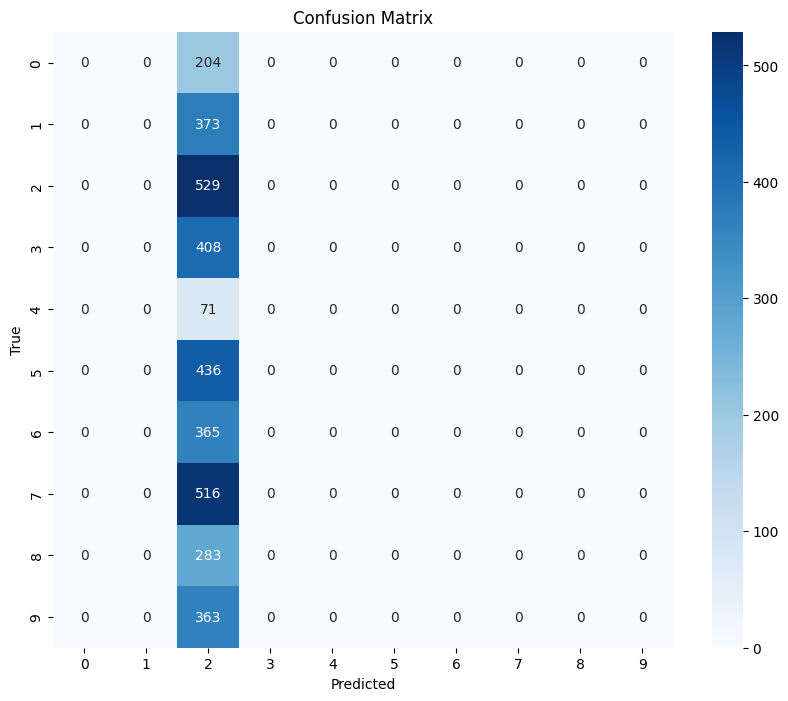

In [9]:
predictions = model_deep.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

galaxy_classes = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxies without Bulge",
    "Edge-on Galaxies with Bulge"
]

# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=galaxy_classes, yticklabels=galaxy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()